# Importaciones

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [16]:
df = pd.read_csv("AndroidAdware2017/TotalFeatures-ISCXFlowMeter.csv")


In [17]:
# Supongamos que la última columna es la variable dependiente (y)
X = df.iloc[:, :-1]  # Características (todas las columnas excepto la última)
y = df.iloc[:, -1]   # Variable dependiente (última columna)


In [19]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalizar los datos (esto es importante para los modelos de regresión logística)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.-Regresion Logistica

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [23]:
# Crear el modelo de regresión logística
logreg = LogisticRegression(random_state=42)

In [24]:
# Entrenar el modelo
logreg.fit(X_train, y_train)

C:\Users\Suseth Sandoval\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [25]:
# Predecir con el conjunto de prueba
y_pred_logreg = logreg.predict(X_test)

# Evaluar el modelo de regresión logística
print("Precisión de la Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Matriz de confusión de la Regresión Logística:\n", confusion_matrix(y_test, y_pred_logreg))

Precisión de la Regresión Logística: 0.7702842765703254
Matriz de confusión de la Regresión Logística:
 [[    0   276   742]
 [    2  9128 21730]
 [    6  6278 88229]]


# 3.- Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [27]:
# Entrenar el modelo
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:

# Predecir con el conjunto de prueba
y_pred_rnd = clf_rnd.predict(X_test)

# Evaluar el modelo de Random Forest
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rnd))
print("Matriz de confusión de Random Forest:\n", confusion_matrix(y_test, y_pred_rnd))

Precisión de Random Forest: 0.9363957876747553
Matriz de confusión de Random Forest:
 [[  489    63   466]
 [   34 26133  4693]
 [   83  2700 91730]]


# 4.- Comparar ambos modelos.

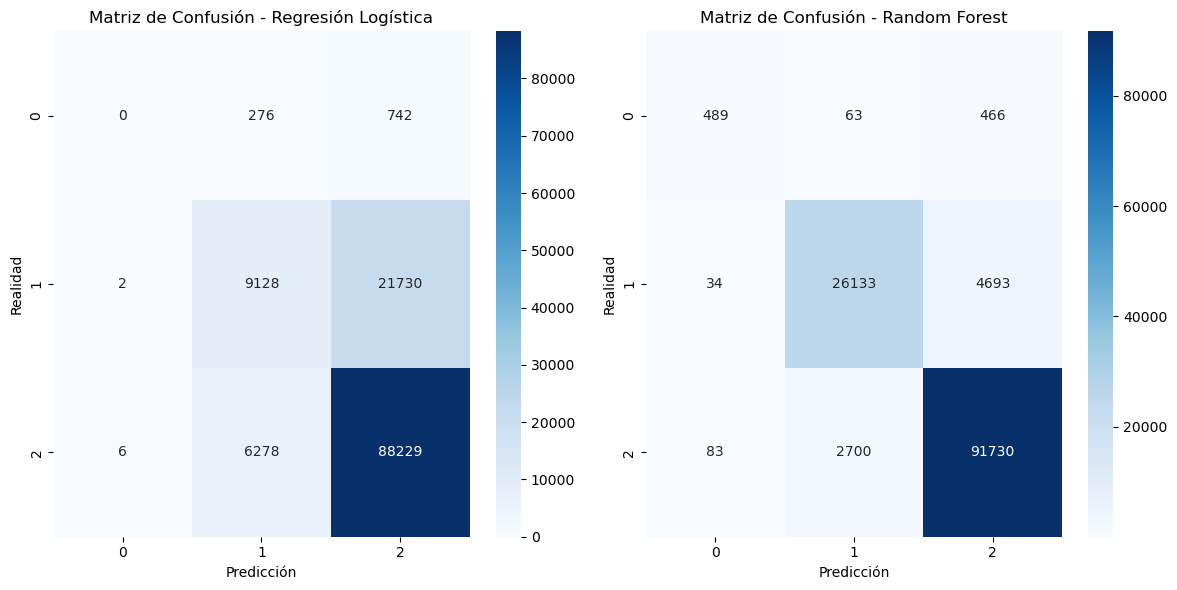

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Matriz de confusión de la Regresión Logística
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Matriz de confusión de Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rnd), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [30]:
print("Precisión de la Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_rnd))


Precisión de la Regresión Logística: 0.7702842765703254
Precisión de Random Forest: 0.9363957876747553
